<a href="https://colab.research.google.com/github/shakib04/practice_cvpr/blob/main/mid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program to classify the hand written numbers

In [1]:
import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(f'Train img shape {train_imgs.shape}')
print(f'Train Label shape {train_labels.shape}')

Train img shape (60000, 28, 28)
Train Label shape (60000,)


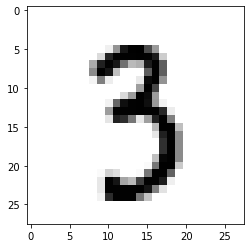

Image Label: 3


In [ ]:
i = 98
plt.figure()
plt.imshow(train_imgs[i], cmap=plt.cm.gray_r)
plt.show()
print(f'Image Label: {train_labels[i]}')

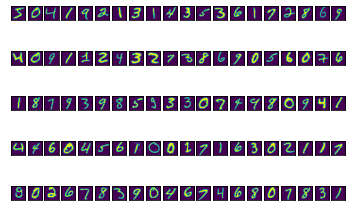

In [ ]:
R = 5
C = 20
i = 0

plt.figure()
for r in range(R):
  for c in range(C):
    plt.subplot(R, C, i + 1)
    plt.imshow(train_imgs[i])
    #remove extra info
    plt.xticks([])
    plt.yticks([])
    i += 1

In [ ]:
#convert numpy 2d array to 1d array # astype # normalization by diving 255
train_imgs_reshaped = train_imgs.reshape(-1, 784).astype('float32') / 255
test_imgs_reshaped = test_imgs.reshape(-1, 784).astype('float32') / 255
#we are losing some information by converting 2d to 1d

In [ ]:
#step: 2 #Sequential layers create hobe (one layer is connected with previous layer)
model = tf.keras.models.Sequential([
       tf.keras.Input(shape= 28 * 28),
       tf.keras.layers.Dense(units=256, activation='relu'),
       tf.keras.layers.Dense(units=128, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax') 
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


ADAM Optimizer

In [ ]:

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)
h = model.fit(x=train_imgs_reshaped, y=train_labels, epochs=5, batch_size=64, validation_split=0.3)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
Epoch 1/5
  4/657 [..............................] - ETA: 11s - loss: 2.1676 - accuracy: 0.2461

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


657/657 [==============================] - 14s 21ms/step - loss: 0.2712 - accuracy: 0.9213 - val_loss: 0.1443 - val_accuracy: 0.9566
Epoch 2/5
657/657 [==============================] - 13s 20ms/step - loss: 0.1048 - accuracy: 0.9692 - val_loss: 0.1107 - val_accuracy: 0.9666
Epoch 3/5
657/657 [==============================] - 13s 20ms/step - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.1032 - val_accuracy: 0.9701
Epoch 4/5
657/657 [==============================] - 13s 19ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.1025 - val_accuracy: 0.9693
Epoch 5/5
657/657 [==============================] - 13s 20ms/step - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.1043 - val_accuracy: 0.9711


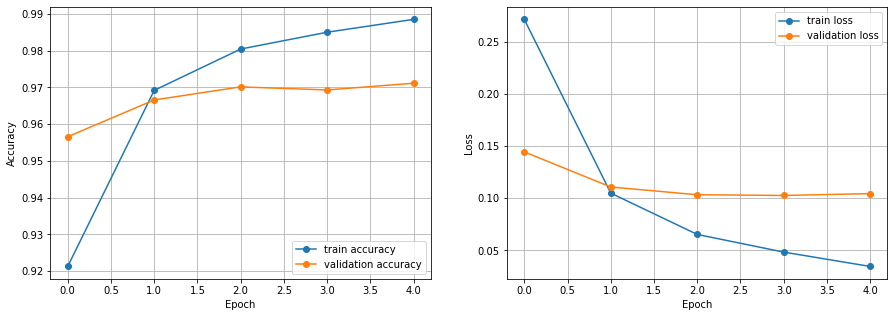

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Evaluate the model on the test dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_imgs_reshaped, test_labels)
print('\nTest accuracy:', test_acc)

 16/313 [>.............................] - ETA: 2s - loss: 0.0685 - accuracy: 0.9805

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 2s 7ms/step - loss: 0.0830 - accuracy: 0.9761

Test accuracy: 0.9761000275611877


Model with differnt parameters(**sigmoid activation** on output layer)

In [ ]:

model = tf.keras.models.Sequential([
       tf.keras.Input(shape= 28 * 28),
       tf.keras.layers.Dense(units=256, activation='relu'),
       tf.keras.layers.Dense(units=128, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='sigmoid') 
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


SGD optimizer

In [ ]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

99.76% accuracy

In [ ]:
tf.config.experimental_run_functions_eagerly(True)
h = model.fit(x=train_imgs_reshaped, y=train_labels, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
  9/657 [..............................] - ETA: 9s - loss: 0.0304 - accuracy: 0.9844

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


657/657 [==============================] - 12s 19ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0865 - val_accuracy: 0.9772
Epoch 2/5
657/657 [==============================] - 13s 19ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0852 - val_accuracy: 0.9782
Epoch 3/5
657/657 [==============================] - 12s 18ms/step - loss: 0.0119 - accuracy: 0.9970 - val_loss: 0.0842 - val_accuracy: 0.9782
Epoch 4/5
657/657 [==============================] - 13s 19ms/step - loss: 0.0110 - accuracy: 0.9974 - val_loss: 0.0845 - val_accuracy: 0.9781
Epoch 5/5
657/657 [==============================] - 12s 19ms/step - loss: 0.0103 - accuracy: 0.9976 - val_loss: 0.0842 - val_accuracy: 0.9787


In [ ]:
test_loss, test_acc = model.evaluate(test_imgs_reshaped, test_labels)
print('\nTest accuracy:', test_acc)

 15/313 [>.............................] - ETA: 2s - loss: 0.0327 - accuracy: 0.9875

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 2s 8ms/step - loss: 0.0675 - accuracy: 0.9817

Test accuracy: 0.9817000031471252


In [ ]:
model = tf.keras.models.Sequential([
       tf.keras.Input(shape= 28 * 28),
       tf.keras.layers.Dense(units=256, activation='relu'),
       tf.keras.layers.Dense(units=128, activation='relu'),
       tf.keras.layers.Dense(units=10, activation='softmax') 
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


RMSprop Optimizer

In [ ]:
model.compile(
    optimizer='RMSprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=train_imgs_reshaped, y=train_labels, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
  5/657 [..............................] - ETA: 17s - loss: 1.8246 - accuracy: 0.4219

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


657/657 [==============================] - 19s 28ms/step - loss: 0.2608 - accuracy: 0.9213 - val_loss: 0.1835 - val_accuracy: 0.9414
Epoch 2/5
657/657 [==============================] - 18s 27ms/step - loss: 0.1056 - accuracy: 0.9684 - val_loss: 0.1378 - val_accuracy: 0.9586
Epoch 3/5
657/657 [==============================] - 18s 28ms/step - loss: 0.0705 - accuracy: 0.9790 - val_loss: 0.1034 - val_accuracy: 0.9709
Epoch 4/5
657/657 [==============================] - 18s 28ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.1229 - val_accuracy: 0.9684
Epoch 5/5
657/657 [==============================] - 18s 28ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.1039 - val_accuracy: 0.9725


In [ ]:
test_loss, test_acc = model.evaluate(test_imgs_reshaped, test_labels)
print('\nTest accuracy:', test_acc)

 14/313 [>.............................] - ETA: 2s - loss: 0.0337 - accuracy: 0.9866

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 3s 8ms/step - loss: 0.0675 - accuracy: 0.9817

Test accuracy: 0.9817000031471252
